In [64]:
# importando a biblioteca
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [45]:
# carregar o arquivo em json
dados_telecom = pd.read_json('/content/TelecomX_Data.json')
dados_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [46]:
dados_telecom = pd.concat([
    dados_telecom.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(dados_telecom['customer']),
    pd.json_normalize(dados_telecom['phone']),
    pd.json_normalize(dados_telecom['internet']),
    pd.json_normalize(dados_telecom['account'])
], axis=1)

dados_telecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [47]:
# renomeando colunas
dados_telecom = dados_telecom.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'gender': 'Sexo',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_conjuge',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_permanencia',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
})

In [48]:
# entendendo o dataset
dados_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Sexo                  7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Possui_conjuge        7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_permanencia     7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  OnlineSecurity        7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [49]:
dados_telecom

,ID_Cliente,Cancelou,Sexo,Idoso,Possui_conjuge,Dependentes,Meses_permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [50]:
dados_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Sexo                  7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Possui_conjuge        7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_permanencia     7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  OnlineSecurity        7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [51]:
#transformando as Colunas que estavam em Object para numeros

colunas_transformadas = ['Meses_permanencia', 'Cobranca_Mensal', 'Cobranca_Total']

# iterar sobre as colunas e aplicar pd.to_numeric individualmente
for col in colunas_transformadas:
    # Verifica se a coluna existe no DataFrame antes de tentar transformá-la
    if col in dados_telecom.columns:
        dados_telecom[col] = pd.to_numeric(dados_telecom[col], errors='coerce')
    else:
        # Imprime uma mensagem se a coluna não for encontrada
        print(f"Coluna '{col}' não encontrada no DataFrame.")

dados_telecom.dtypes

,0
ID_Cliente,object
Cancelou,object
Sexo,object
Idoso,int64
Possui_conjuge,object
Dependentes,object
Meses_permanencia,int64
Servico_Telefone,object
Multiplas_Linhas,object
Tipo_Internet,object


In [52]:
dados_telecom.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Sexo,0
Idoso,0
Possui_conjuge,0
Dependentes,0
Meses_permanencia,0
Servico_Telefone,0
Multiplas_Linhas,0
Tipo_Internet,0


In [53]:
dados_telecom[dados_telecom['Cobranca_Total'].isnull()]

dados_telecom['Cobranca_Total'] = dados_telecom['Cobranca_Total'].fillna(0)

dados_telecom['Cancelou'] = dados_telecom['Cancelou']

In [54]:
# lista de valores a serem considerados falso nulo
false_null_values = ['', ' ', 'NA', 'NaN', 'null']

# Iterando pelas colunas do tipo 'object' que não foram mapeadas para booleano
object_cols_to_check = dados_telecom.select_dtypes(include='object').columns
boolean_mapped_cols = [col for col, dtype in dados_telecom.dtypes.items() if dtype == 'bool' and col in object_cols_to_check]

cols_to_check = [col for col in object_cols_to_check if col not in boolean_mapped_cols]

print("Verificando 'falso nulo' nas seguintes colunas:")
print(cols_to_check)
print("-" * 30)

for col in cols_to_check:
    false_nulls_in_col = dados_telecom[dados_telecom[col].astype(str).str.strip().isin(false_null_values)]

    if not false_nulls_in_col.empty:
        print(f"Linhas com 'falso nulo' na coluna '{col}':")
        display(false_nulls_in_col)
        print(f"\nContagem de 'falso nulo' na coluna '{col}': {false_nulls_in_col.shape[0]}")
        print("-" * 30)
    else:
        print(f"Nenhum 'falso nulo' encontrado na coluna '{col}'.")
        print("-" * 30)

Verificando 'falso nulo' nas seguintes colunas:
['ID_Cliente', 'Cancelou', 'Sexo', 'Possui_conjuge', 'Dependentes', 'Servico_Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento']
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'ID_Cliente'.
------------------------------
Linhas com 'falso nulo' na coluna 'Cancelou':


,ID_Cliente,Cancelou,Sexo,Idoso,Possui_conjuge,Dependentes,Meses_permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90



Contagem de 'falso nulo' na coluna 'Cancelou': 224
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Sexo'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Possui_conjuge'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Dependentes'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Servico_Telefone'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Multiplas_Linhas'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tipo_Internet'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'OnlineSecurity'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Backup_Online'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Protecao_Dispositivo'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Suporte_Tecnico'.
------------------------------
Nenhum 'falso nulo' e

In [55]:
print("\nValores únicos na coluna 'Cancelamento' antes da limpeza:", dados_telecom['Cancelou'].unique())


Valores únicos na coluna 'Cancelamento' antes da limpeza: ['No' 'Yes' '']


In [56]:
# Substituir strings vazias por 'Desconhecido'
dados_telecom['Cancelou'] = dados_telecom['Cancelou'].replace('', 'Desconhecido')

In [57]:
# Remover linhas onde a coluna 'Cancelamento' é igual a 'Desconhecido'
dados = dados_telecom.drop(dados_telecom[dados_telecom['Cancelou'] == 'Desconhecido'].index)

In [58]:
# Exibir os valores únicos para garantir que a limpeza foi eficaz
print("\nValores únicos na coluna 'Cancelamento' após a limpeza:", dados_telecom['Cancelou'].unique())
print("\nContagem de valores na coluna 'Cancelamento' após a limpeza:\n", dados_telecom['Cancelou'].value_counts())


Valores únicos na coluna 'Cancelamento' após a limpeza: ['No' 'Yes' 'Desconhecido']

Contagem de valores na coluna 'Cancelamento' após a limpeza:
 Cancelou
No              5174
Yes             1869
Desconhecido     224
Name: count, dtype: int64


In [62]:
dados_telecom.describe

,Idoso,Meses_permanencia,Cobranca_Mensal,Cobranca_Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035
std,0.369074,24.571773,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


from matplotlib import pyplot as plt
_df_0['Idoso'].plot(kind='hist', bins=20, title='Idoso')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Meses_permanencia'].plot(kind='hist', bins=20, title='Meses_permanencia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cobranca_Mensal'].plot(kind='hist', bins=20, title='Cobranca_Mensal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Cobranca_Total'].plot(kind='hist', bins=20, title='Cobranca_Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Idoso', y='Meses_permanencia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Meses_permanencia', y='Cobranca_Mensal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Cobranca_Mensal', y='Cobranca_Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Idoso'].plot(kind='line', figsize=(8, 4), title='Idoso')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Meses_permanencia'].plot(kind='line', figsize=(8, 4), title='Meses_permanencia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Cobranca_Mensal'].plot(kind='line', figsize=(8, 4), title='Cobranca_Mensal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Cobranca_Total'].plot(kind='line', figsize=(8, 4), title='Cobranca_Total')
plt.gca().spines[['top', 'right']].set_visible(False)

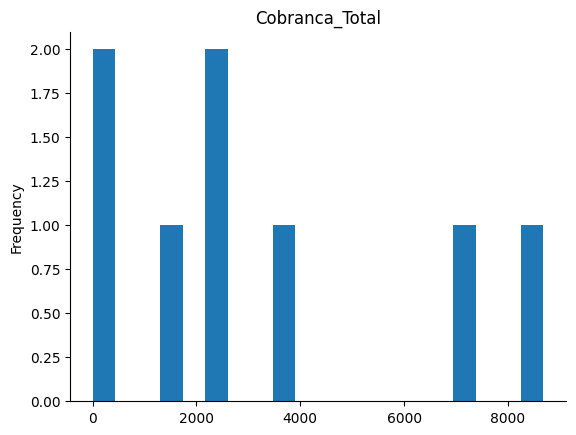

In [68]:
from matplotlib import pyplot as plt
_df_4['Cobranca_Total'].plot(kind='hist', bins=20, title='Cobranca_Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

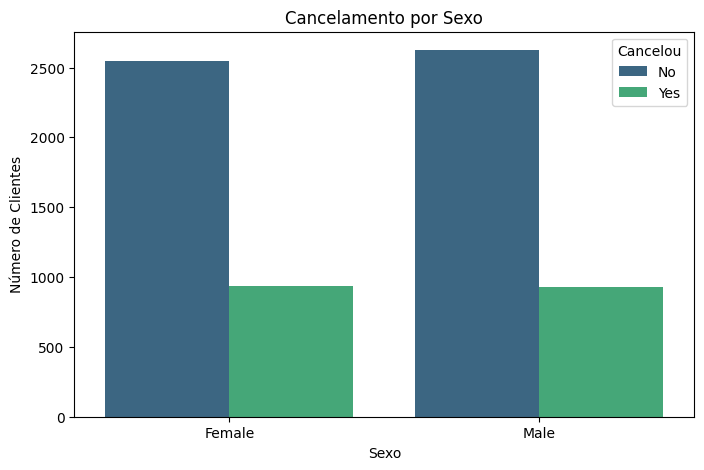

In [81]:
# Churn por Gênero
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Sexo', hue='Cancelou', data=dados, palette='viridis') # Alterado para 'viridis'
plt.title('Cancelamento por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelou')
plt.show()

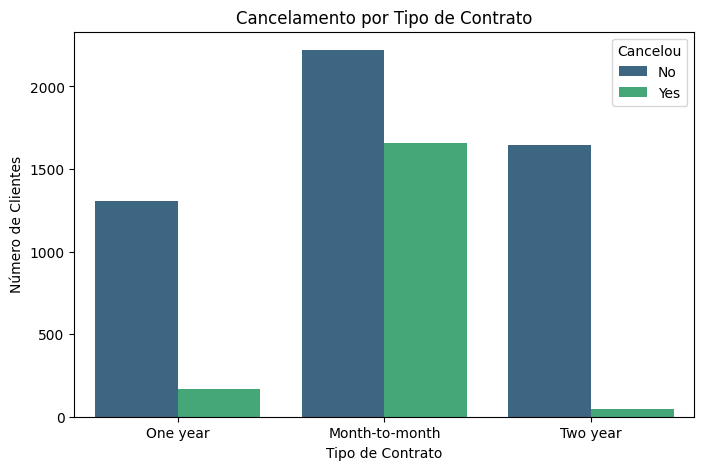

In [82]:
# Cancelamento por Tipo de Contrato
plt.figure(figsize=(8, 5))
sns.countplot(x='Tipo_Contrato', hue='Cancelou', data=dados, palette='viridis')
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelou')
plt.show()

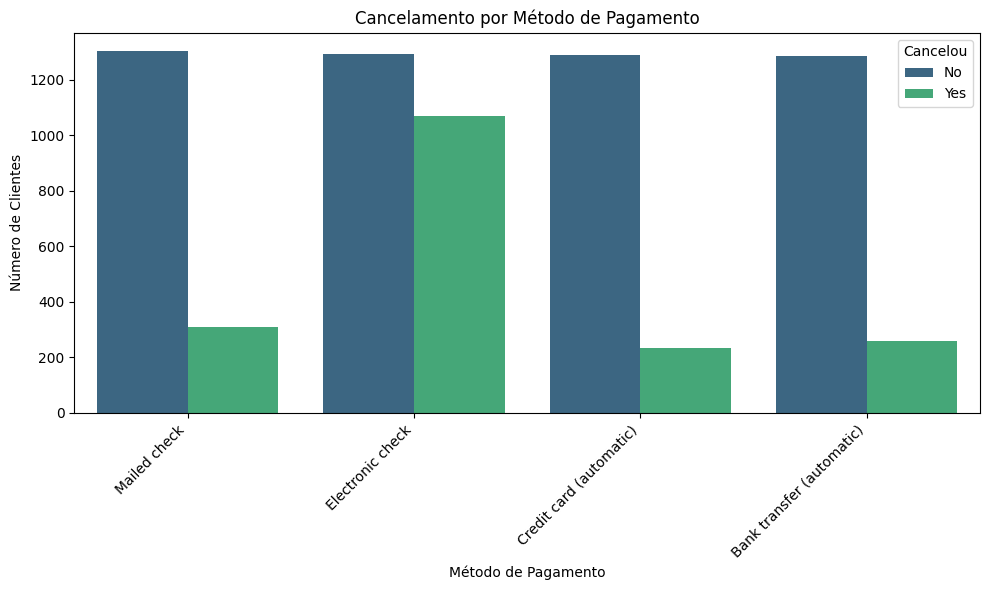

In [83]:
# Cancelamento por Método de Pagamento
plt.figure(figsize=(10, 6))
sns.countplot(x='Metodo_Pagamento', hue='Cancelou', data=dados, palette='viridis')
plt.title('Cancelamento por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo x para melhor leitura
plt.legend(title='Cancelou')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

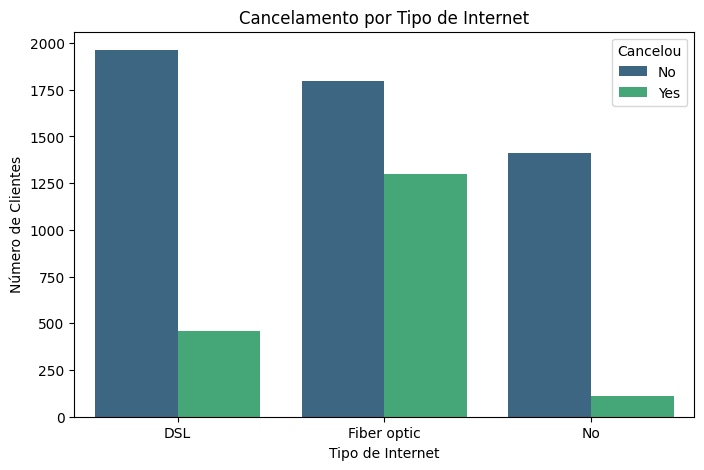

In [84]:
# Cancelamento por Tipo de Internet
plt.figure(figsize=(8, 5))
sns.countplot(x='Tipo_Internet', hue='Cancelou', data=dados, palette='viridis')
plt.title('Cancelamento por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelou')
plt.show()

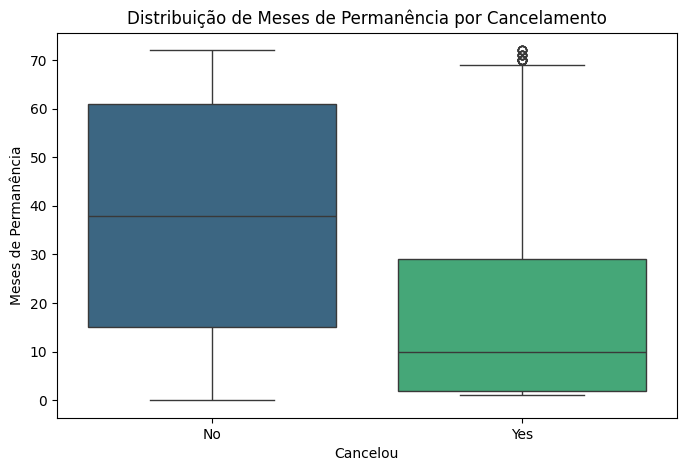

In [88]:
# Box plot para Meses_permanencia vs Cancelou
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancelou', y='Meses_permanencia', data=dados, palette='viridis', hue='Cancelou')
plt.title('Distribuição de Meses de Permanência por Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Meses de Permanência')
plt.show()

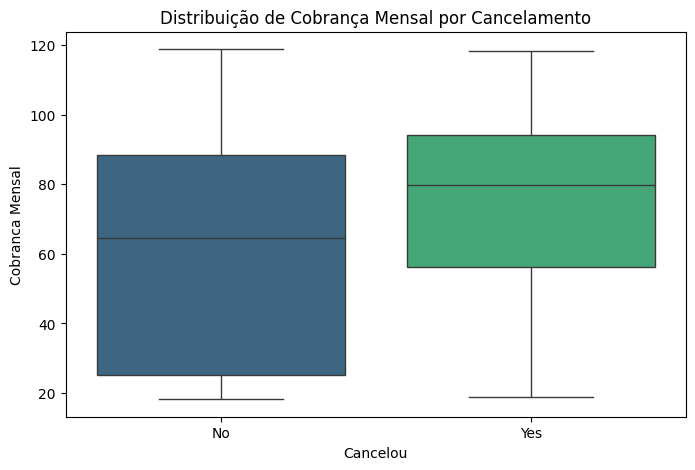

In [89]:
# Box plot para Cobranca_Mensal vs Cancelou
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancelou', y='Cobranca_Mensal', data=dados, palette='viridis', hue='Cancelou')
plt.title('Distribuição de Cobrança Mensal por Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Cobranca Mensal')
plt.show()

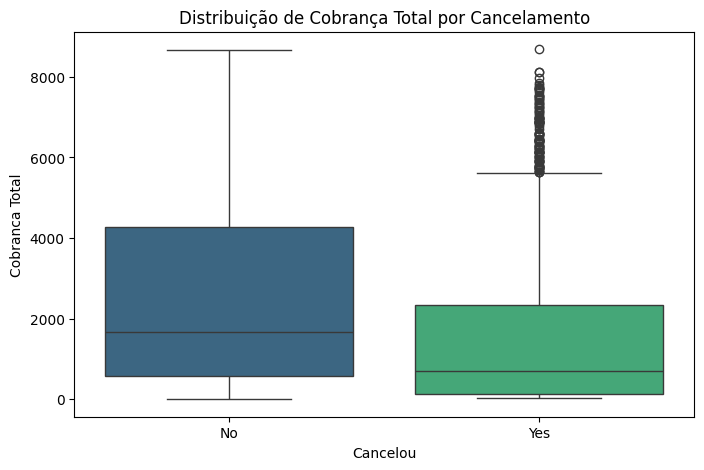

In [90]:
# Box plot para Cobranca_Total vs Cancelou
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancelou', y='Cobranca_Total', data=dados, palette='viridis', hue='Cancelou')
plt.title('Distribuição de Cobrança Total por Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Cobranca Total')
plt.show()

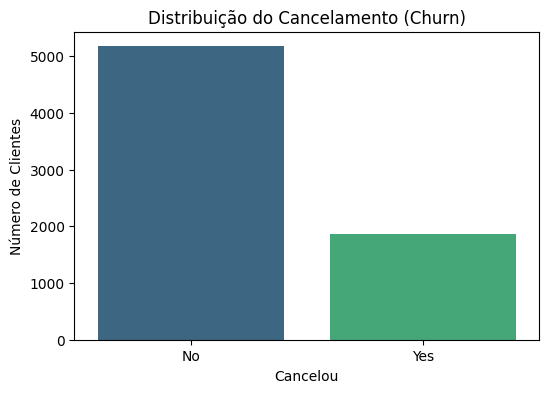

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição do Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Cancelou', data=dados, palette='viridis', hue = "Cancelou", legend = False)
plt.title('Distribuição do Cancelamento (Churn)')
plt.xlabel('Cancelou')
plt.ylabel('Número de Clientes')
plt.show()

In [92]:
# Calcular a contagem de clientes por status de cancelamento
churn_counts = dados['Cancelou'].value_counts()

# Calcular a proporção de clientes por status de cancelamento
churn_proportions = dados['Cancelou'].value_counts(normalize=True) * 100

print("Contagem de clientes por status de cancelamento:")
print(churn_counts)
print("\nProporção (%) de clientes por status de cancelamento:")
print(churn_proportions)

Contagem de clientes por status de cancelamento:
Cancelou
No     5174
Yes    1869
Name: count, dtype: int64

Proporção (%) de clientes por status de cancelamento:
Cancelou
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# Relatório de Análise TelecomX

## Introdução

O objetivo desta análise é investigar os fatores que levam os clientes da TelecomX a cancelar seus serviços (churn). Compreender as razões por trás do cancelamento é crucial para a empresa, pois permite identificar padrões de comportamento dos clientes, prever quais clientes estão em risco de sair e implementar estratégias de retenção eficazes. A redução do churn é fundamental para a sustentabilidade e o crescimento da TelecomX, pois a retenção de clientes geralmente é mais econômica do que a aquisição de novos clientes.

## Limpeza e Tratamento de Dados

Nesta seção, detalhamos as etapas realizadas para preparar os dados para a análise de churn.

1.  **Carregamento dos Dados:** Os dados foram carregados a partir do arquivo JSON `TelecomX_Data.json` para um DataFrame pandas.
2.  **Normalização e Concatenação:** As colunas aninhadas ('customer', 'phone', 'internet', 'account') foram normalizadas e integradas ao DataFrame principal, removendo as colunas originais.
3.  **Renomeação de Colunas:** As colunas foram renomeadas para termos mais descritivos em português, facilitando a compreensão.
4.  **Tratamento de Valores Ausentes na 'Cobranca_Total':** Os 11 valores ausentes (NaN) na coluna 'Cobranca_Total' foram identificados e preenchidos com 0.
5.  **Transformação de Tipos de Dados:** Colunas numéricas ('Meses_permanencia', 'Cobranca_Mensal', 'Cobranca_Total') foram explicitamente convertidas para tipos numéricos.
6.  **Tratamento de "Falso Nulo" na 'Cancelou':** Strings vazias ('') na coluna 'Cancelou' foram substituídas pela string 'Desconhecido'.
7.  **Remoção de Dados Incompletos na 'Cancelou':** As linhas onde a coluna 'Cancelou' continha o valor 'Desconhecido' foram removidas do DataFrame para focar a análise em clientes com status de cancelamento definido. O DataFrame resultante dessa limpeza foi nomeado `dados`.

## Análise Exploratória de Dados (AED)

Nesta seção, apresentamos os principais achados da análise exploratória dos dados, utilizando visualizações para identificar padrões relacionados ao cancelamento de clientes.

*   **Distribuição Geral do Cancelamento (Churn):** A análise da variável 'Cancelou' revelou que a maioria dos clientes (`aproximadamente 73.5%`) não cancelou o serviço, enquanto uma parcela significativa (`aproximadamente 26.5%`) efetuou o cancelamento.

*   **Cancelamento por Sexo:** A taxa de cancelamento se mostrou similar entre clientes do sexo masculino e feminino, indicando que o gênero não é um fator fortemente associado ao churn neste conjunto de dados.

*   **Cancelamento por Tipo de Contrato:** Observou-se que clientes com contratos **mês a mês** apresentam uma taxa de cancelamento consideravelmente mais alta em comparação com aqueles que possuem contratos de um ou dois anos. Contratos de longo prazo parecem estar associados a uma maior retenção de clientes.

*   **Cancelamento por Método de Pagamento:** Clientes que utilizam **cheque eletrônico** como método de pagamento demonstraram uma propensão maior ao cancelamento em relação aos que utilizam outras formas de pagamento (cheque pelo correio, transferência bancária, cartão de crédito automático).

*   **Cancelamento por Tipo de Internet:** A análise por tipo de serviço de internet indicou que clientes com **fibra ótica** têm uma taxa de cancelamento mais alta do que aqueles com serviço DSL ou sem serviço de internet.

*   **Distribuição de Variáveis Numéricas por Cancelamento:**
    *   **Meses de Permanência:** Clientes que cancelaram tendem a ter um tempo de permanência significativamente menor na empresa do que aqueles que não cancelaram.
    *   **Cobranca Mensal:** Clientes que cancelaram apresentaram, em média, cobranças mensais mais elevadas.
    *   **Cobranca Total:** Consequentemente, a cobrança total acumulada é menor para clientes que cancelam, refletindo seu menor tempo de permanência, apesar das cobranças mensais mais altas.

## Conclusões e Insights

A análise exploratória de dados revelou insights importantes sobre os fatores que influenciam o cancelamento de clientes na TelecomX. Os principais pontos de atenção são:

*   **Tipo de Contrato:** Clientes com contratos de menor duração (mês a mês) são mais propensos a cancelar.
*   **Método de Pagamento:** O uso de cheque eletrônico está associado a uma maior taxa de churn.
*   **Tipo de Internet:** Clientes de fibra ótica apresentam uma taxa de cancelamento mais alta.
*   **Tempo de Permanência e Cobranças:** Clientes que cancelam são frequentemente novos clientes com cobranças mensais mais altas.

Compreender esses padrões é fundamental para a empresa, pois permite direcionar esforços de retenção para os segmentos de clientes mais vulneráveis ao churn.

## Recomendações

Com base nos insights obtidos na análise, as seguintes recomendações podem ser consideradas pela TelecomX para reduzir a evasão de clientes:

*   **Incentivar Contratos de Longo Prazo:** Criar ofertas ou benefícios exclusivos para clientes que optarem por contratos de um ou dois anos, destacando as vantagens e a estabilidade.
*   **Revisar a Experiência de Clientes de Fibra Ótica:** Investigar as possíveis razões por trás da alta taxa de churn entre usuários de fibra ótica. Isso pode envolver a análise da qualidade do serviço, problemas técnicos, expectativas dos clientes ou concorrência. Melhorar a experiência deste grupo pode ter um impacto significativo na retenção.
*   **Analisar o Método de Pagamento Cheque Eletrônico:** Investigar por que clientes que utilizam este método de pagamento são mais propensos a cancelar. Pode haver problemas no processo de pagamento, falta de segurança percebida ou outros fatores que precisam ser compreendidos e, se possível, mitigados.
*   **Estratégias de Retenção para Novos Clientes:** Implementar programas de acompanhamento e engajamento para clientes nos primeiros meses de serviço, especialmente aqueles com cobranças mensais mais altas. Oferecer suporte proativo e garantir que suas expectativas sejam atendidas pode ajudar a reduzir o churn inicial.
*   **Monitoramento Contínuo:** Implementar um sistema de monitoramento contínuo dos principais indicadores de churn e realizar análises regulares para identificar novas tendências e avaliar a eficácia das estratégias de retenção implementadas.